<a href="https://colab.research.google.com/github/namyaagrawal03/Insurance_fraud/blob/main/insurance_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv("/content/drive/MyDrive/fraud_oracle.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [47]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [48]:
len(df.columns)

33

In [49]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [51]:
#we can remove irrelevant data
df=df[['Make','AccidentArea', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice',  'Deductible', 'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound_P']]

In [52]:
df.shape

(15420, 23)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Make                 15420 non-null  object
 1   AccidentArea         15420 non-null  object
 2   Sex                  15420 non-null  object
 3   MaritalStatus        15420 non-null  object
 4   Age                  15420 non-null  int64 
 5   Fault                15420 non-null  object
 6   PolicyType           15420 non-null  object
 7   VehicleCategory      15420 non-null  object
 8   VehiclePrice         15420 non-null  object
 9   Deductible           15420 non-null  int64 
 10  DriverRating         15420 non-null  int64 
 11  PastNumberOfClaims   15420 non-null  object
 12  AgeOfVehicle         15420 non-null  object
 13  AgeOfPolicyHolder    15420 non-null  object
 14  PoliceReportFiled    15420 non-null  object
 15  WitnessPresent       15420 non-null  object
 16  Agen

In [54]:
correlation_matrix = df.corr()

<ipython-input-54-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


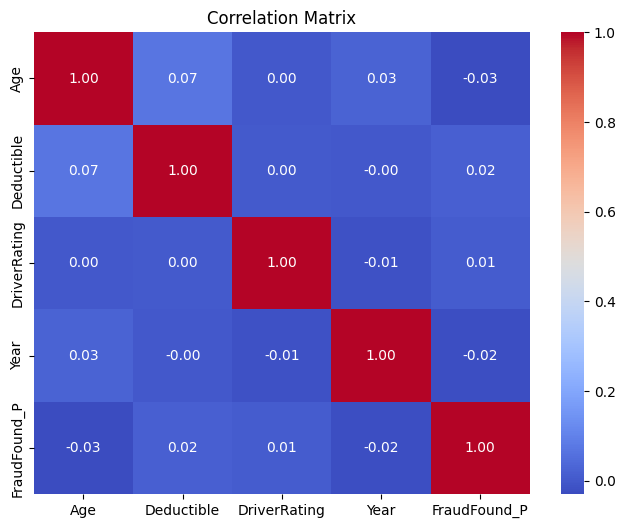

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
#no correlation found

In [56]:
print('Out of all % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

# we have highly unbalanced  data

Out of all % of records not commited fraud==>  94.01426718547341
Out of all % of records commited fraud==>  5.985732814526589


In [57]:
#oversampling

from sklearn.utils import resample

oversamp=resample(df[df['FraudFound_P']==1],
                 replace=True,
                 n_samples=len(df[df['FraudFound_P']==0]),
                 random_state=30)
df=pd.concat([oversamp, df[df['FraudFound_P']==0]])

In [58]:
print('Out of all % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

Out of all % of records not commited fraud==>  50.0
Out of all % of records commited fraud==>  50.0


In [59]:
x=df.drop('FraudFound_P', axis=1 )
y=df['FraudFound_P']

In [60]:
categorical_cols=x.select_dtypes(include =['object'])
categorical_cols= pd.get_dummies(categorical_cols, drop_first= True)
categorical_cols.head()

,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
13241,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6300,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
13425,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7618,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2167,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
numerical_col=x.select_dtypes(include= ['int64'])
x=pd.concat([numerical_col, categorical_cols], axis=1)

In [62]:
x.head()

,Age,Deductible,DriverRating,Year,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
13241,30,400,3,1996,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6300,37,400,1,1995,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
13425,30,400,1,1996,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7618,28,400,1,1995,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2167,55,400,2,1994,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
#kaggle wale ke according split and apply model
#youtube video ke according bhi same

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=13)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [71]:
x_train[['Age', 'Deductible', 'Year', 'DriverRating']]=scaler.fit_transform(x_train[['Age', 'Deductible', 'Year', 'DriverRating']])
x_test[['Age', 'Deductible', 'Year', 'DriverRating']]=scaler.transform(x_test[['Age', 'Deductible', 'Year', 'DriverRating']])

In [72]:
x_train.head()

,Age,Deductible,DriverRating,Year,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
13946,0.498818,-0.199668,-1.338942,1.464951,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9928,-0.533922,-0.199668,0.445212,0.216621,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3338,1.310257,-0.199668,1.337288,-1.031709,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
14808,-0.976525,-0.199668,-1.338942,1.464951,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1476,-0.238854,-0.199668,-0.446865,-1.031709,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [73]:
from sklearn.svm import SVC
svc=SVC()

In [74]:
svc.fit(x_train, y_train)
y_pred1= svc.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score
print("svc_model_train_acc: ", accuracy_score(y_train, svc.predict(x_train)))

svc_model_train_acc:  0.874628152619099


In [76]:
print("svc_model_test_acc: ", accuracy_score(y_pred1, y_test))

svc_model_test_acc:  0.8534230039662011


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [78]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred2= knn.predict(x_test)

In [80]:
print("knn_model_train_acc: ", accuracy_score(y_train, knn.predict(x_train)))
print("knn_model_test_acc: ", accuracy_score( y_test, y_pred2))

knn_model_train_acc:  0.9382194438456564
knn_model_test_acc:  0.9099844800827729


In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred3= dtc.predict(x_test)
print("dtc_model_train_acc: ", accuracy_score(y_train, dtc.predict(x_train)))
print("dtc_model_test_acc: ", accuracy_score( y_test, y_pred3))

dtc_model_train_acc:  0.9991808579435223
dtc_model_test_acc:  0.9624073116054492


In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred4= rfc.predict(x_test)
print("rfc_model_train_acc: ", accuracy_score(y_train, rfc.predict(x_train)))
print("rfc_model_test_acc: ", accuracy_score( y_test, y_pred4))

rfc_model_train_acc:  0.9991808579435223
rfc_model_test_acc:  0.9912053802379721
